# Trilayer SOTs

In [1]:
import OneD_SDD as sdd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
E = np.array([1e6,0,0]) # V/m
W  = sdd.HM_BulkParameters(De = 0.0002, sigma = 0.721e6, l_sf =  1.6e-9, theta_SHAy = -0.6*0)
CoFeB1 = sdd.FM_BulkParameters(De = 0.001, sigma = 3.3e6, l_sf = 12e-9, l_J = 1.2e-9, l_phi = 0.8e-9, m = np.array([1,0,0]), beta_S = 0.56, beta_D = 0.7)
CoFeB2 = sdd.FM_BulkParameters(De = 0.001, sigma = 3.3e6, l_sf = 12e-9, l_J = 1.2e-9, l_phi = 0.8e-9, m = np.array([1,0,0]), beta_S = 0.56, beta_D = 0.7)
W_CoFeB_int1 = sdd.MCT_Rashba_InterfaceParameters(G_mix=0.4e15 +1j*0.2e15,G_up=1.0e15,G_down=0.1e15, sigma_mix=-0.91e6 +1j*0.13e6, gamma_mix=-0.5e6,sigma_up=0.0,sigma_down=0.0, full_absorption=False)
W_CoFeB_int2 = sdd.MCT_Rashba_InterfaceParameters(G_mix=0.4e15 +1j*0.2e15,G_up=1.0e15,G_down=0.1e15, sigma_mix= 0e6 +1j*0.06, gamma_mix=0.0e6,sigma_up=0.0,sigma_down=0.0, full_absorption=False)

In [3]:
d_Co1 = 2e-9
d_Pt  = 4e-9
d_Co2 = 2e-9
ints1 = np.array([-d_Co1-d_Pt,-d_Pt,0.0,d_Pt + d_Co2])
bulk_params = [CoFeB1,W,CoFeB2]
int_params = [W_CoFeB_int1 , W_CoFeB_int2]
LinSys = sdd.SDD_1D_solver(E, ints1, bulk_params, int_params)
LinSys.solve_linear_system()
z1,Jsx1,Jsy1,Jsz1 = LinSys.get_spin_current()  

d_Co1 = 4e-9
d_Pt  = 2e-9
d_Co2 = 2e-9
ints2 = np.array([-d_Co1-d_Pt,-d_Pt,0.0,d_Pt + d_Co2])
bulk_params = [CoFeB1,W,CoFeB2]
int_params = [W_CoFeB_int1 , W_CoFeB_int2]
LinSys = sdd.SDD_1D_solver(E, ints2, bulk_params, int_params)
LinSys.solve_linear_system()
z2,Jsx2,Jsy2,Jsz2 = LinSys.get_spin_current()  

d_Co1 = 5e-9
d_Pt  = 1e-9
d_Co2 = 2e-9
ints3 = np.array([-d_Co1-d_Pt,-d_Pt,0.0,d_Pt + d_Co2])
bulk_params = [CoFeB1,W,CoFeB2]
int_params = [W_CoFeB_int1 , W_CoFeB_int2]
LinSys = sdd.SDD_1D_solver(E, ints3, bulk_params, int_params)
LinSys.solve_linear_system()
z3,Jsx3,Jsy3,Jsz3 = LinSys.get_spin_current()  


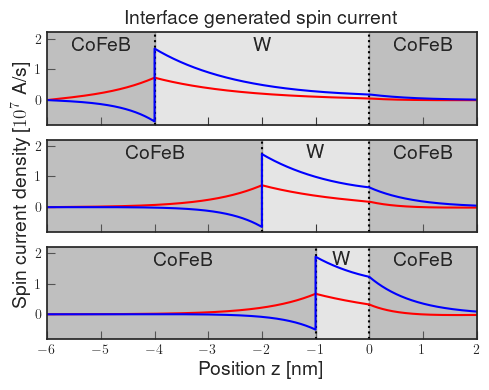

In [4]:
conv = 1e-7
    
plt.style.use('seaborn-v0_8-ticks')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
fig, (ax1,ax2,ax3) = plt.subplots(3,1,sharex=True,sharey=True,figsize=(5,4))
for i in range(2):
    ax1.axvline(x=(ints1[1:-1])[i]*1e9, color='k', linestyle=':')
    ax2.axvline(x=(ints2[1:-1])[i]*1e9, color='k', linestyle=':')
    ax3.axvline(x=(ints3[1:-1])[i]*1e9, color='k', linestyle=':')

ax1.fill_betweenx([-6, 6], (-d_Co1 - 4)*1e9, - 4, color='gray', alpha=0.5)
ax2.fill_betweenx([-6, 6], (-d_Co1 - 2)*1e9, - 2, color='gray', alpha=0.5)
ax3.fill_betweenx([-6, 6], (-d_Co1 - 1)*1e9, - 1, color='gray', alpha=0.5)
ax1.fill_betweenx([-6, 6], -4, 0, color='gray', alpha=0.2)
ax2.fill_betweenx([-6, 6], -2, 0, color='gray', alpha=0.2)
ax3.fill_betweenx([-6, 6], -1, 0, color='gray', alpha=0.2)
ax1.fill_betweenx([-6, 6], 0, d_Co2*1e9, color='gray', alpha=0.5)
ax2.fill_betweenx([-6, 6], 0, d_Co2*1e9, color='gray', alpha=0.5)
ax3.fill_betweenx([-6, 6], 0, d_Co2*1e9, color='gray', alpha=0.5)

ax1.plot(z1*1e9,Jsy1*conv,label='y',linestyle='-',color='red')
ax1.plot(z1*1e9,Jsz1*conv,label='$P_B=0.46$',linestyle='-',color='blue')

ax2.plot(z2*1e9,Jsy2*conv,label='y',linestyle='-',color='red')
ax2.plot(z2*1e9,Jsz2*conv,label='$z, P_B=0.46$',linestyle='-',color='blue')

ax3.plot(z3*1e9,Jsy3*conv,label='$y$',linestyle='-',color='red')
ax3.plot(z3*1e9,Jsz3*conv,label='$z$',linestyle='-',color='blue')

ax1.text(0.125, 0.85, r'CoFeB', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,fontsize=14)
ax1.text(  0.5, 0.85, r'W', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,fontsize=14)
ax1.text(0.875, 0.85, r'CoFeB', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,fontsize=14)
ax2.text( 0.25, 0.85, r'CoFeB', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes,fontsize=14)
ax2.text(0.625, 0.85, r'W', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes,fontsize=14)
ax2.text(0.875, 0.85, r'CoFeB', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes,fontsize=14)
ax3.text(0.315, 0.85, r'CoFeB', horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes,fontsize=14)
ax3.text(0.685, 0.85, r'W', horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes,fontsize=14)
ax3.text(0.875, 0.85, r'CoFeB', horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes,fontsize=14)

# ax1.text(-0.05, 1.5, '(a)', fontsize=14, transform=ax1.transAxes, va='top')

# ax3.legend(fontsize=14, loc = "upper right",ncol=1)
ax3.set_xlabel('Position z [nm]',fontsize=14)
ax2.set_ylabel(r'Spin current density [$10^7 $ A/s]',fontsize=14)
ax1.set_title(r'Interface generated spin current',fontsize=14)
for ax in [ax1,ax2,ax3]:
    ax.set_xlim([-6,2])
    ax.set_ylim([-0.8,2.2])

plt.tight_layout()
plt.show()

In [5]:
d_CoFeB1    = 2e-9
d_CoFeB2    = 2e-9
d_HM = np.linspace(0.03,10,100)*1e-9
T_REE1 =  np.zeros((d_HM.shape[0],3))
Jx = np.zeros(d_HM.shape[0])
Jy = np.zeros(d_HM.shape[0])
Jz = np.zeros(d_HM.shape[0])

for i in range(d_HM.shape[0]):
    ints = np.array([0,d_CoFeB1,d_HM[i] + d_CoFeB1,d_HM[i] + d_CoFeB1 + d_CoFeB2])
    bulk_params = [CoFeB1,W,CoFeB2]
    int_params = [W_CoFeB_int1 , W_CoFeB_int2]
    LinSys = sdd.SDD_1D_solver(E, ints, bulk_params, int_params)
    LinSys.solve_linear_system()
    z,Jsx,Jsy,Jsz = LinSys.get_spin_current() 
    
    Jx[i] = Jsx[np.argwhere(z==ints[2])][0][0]
    Jy[i] = Jsy[np.argwhere(z==ints[2])][0][0] 
    Jz[i] = Jsz[np.argwhere(z==ints[2])][0][0]

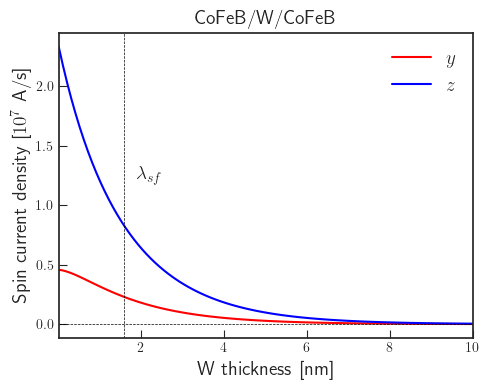

In [6]:
conv= 1e-7
    
plt.style.use('seaborn-v0_8-ticks')

# plt.style.use('seaborn-dark')
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
fig, ax1 = plt.subplots(1,1,sharex=True,sharey=False,figsize=(5,4))
ax1.plot(d_HM*1e9,conv*Jy, label = r"$y$", color = 'red')
ax1.plot(d_HM*1e9,conv*Jz, label = r"$z$", color = 'blue')

ax1.axvline(x=W.l_sf*1e9, color='k', linestyle='--', lw = 0.5)
ax1.text(2.5, 0.5, r'$\lambda_{sf}$', verticalalignment='bottom', horizontalalignment='right', transform=ax1.get_xaxis_transform(),fontsize=14)
for ax in [ax1,ax2]:
    ax.set_xlim([d_HM[0]*1e9,d_HM[-1]*1e9])
    ax.axhline(0, color = 'k', ls = '--', lw = 0.5)

ax1.legend(fontsize=14,loc = 'upper right')
ax1.set_xlabel('W thickness [nm]',fontsize=14)
ax1.set_title("CoFeB/W/CoFeB",fontsize=14)
ax1.set_ylabel(r'Spin current density [$10^7 $ A/s]',fontsize=14)
plt.tight_layout()
plt.show()

In [7]:
from matplotlib.colors import Normalize
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['image.cmap'] = "viridis_r"
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.cm as cm

In [8]:
def plot_angular_dependence(Theta,Phi,Torque,scale,U,V):
    conv = 1e3/(1.760859708e+11*0.81e6*1.0e-9)
    fig, ax = plt.subplots(1,1,sharex=True,sharey=True,figsize =(8,6))
    normalizer=Normalize(0,1*scale*conv)
    im=cm.ScalarMappable(norm=normalizer)
    ax.contourf(Phi*180/np.pi,Theta*180/np.pi,conv*Torque,25,norm=normalizer)
    ax.streamplot(Phi*180/np.pi,Theta*180/np.pi,U,V,color='white',linewidth=1.0,density=0.50)
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.xaxis.set_tick_params(which='major', size=8,width = 1.5)
    ax.xaxis.set_tick_params(which='minor', size=4,width = 1.5)
    ax.yaxis.set_tick_params(which='major', size=8,width = 1.5)
    ax.yaxis.set_tick_params(which='minor', size=4,width = 1.5)
    cb = fig.colorbar(im, ax=ax, location="top",aspect=20,shrink=0.75)
    cb.set_label(label=r"Spin Torque [mT]", size=14)
    cb.ax.tick_params(which='major', size=12,width = 1.5)  # Increase tick size
    cb.ax.tick_params(which='minor', size=8,width = 1.5)  # Increase tick size
    ax.set_xlabel(r"Azimuthal angle $[^\circ]$",size = 14)
    ax.xaxis.set_major_locator(MultipleLocator(90))
    ax.xaxis.set_minor_locator(MultipleLocator(45))
    ax.set_xticks([90,180,270,360])
    ax.set_ylabel(r"Polar angle $[^\circ]$ ",size = 14)
    ax.yaxis.set_major_locator(MultipleLocator(45))
    ax.yaxis.set_minor_locator(MultipleLocator(15))
    ax.set_yticks([45,90,135,180])

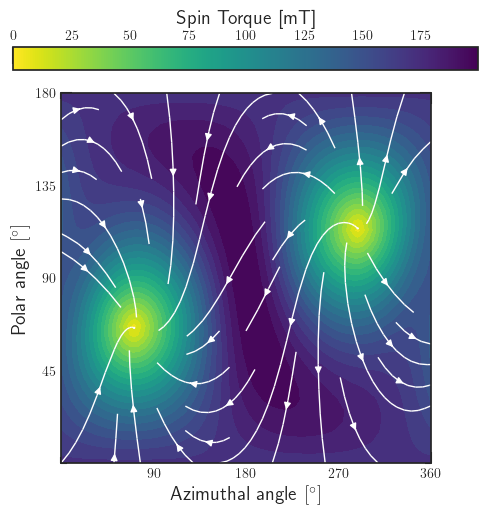

In [9]:
# example code : 
ints = np.array([0.0,4e-9,5.0e-9,6.0e-9])
E = np.array([-1e6,0,0])

CoFeB1 = sdd.FM_BulkParameters( De = 0.001, sigma = 3.3e6, l_sf = 12e-9, l_J = 1.2e-9, l_phi = 2.0e-9, m = np.array([1,0,0]), beta_S = 0.56, beta_D = 0.7)
CoFeB2 = sdd.FM_BulkParameters( De = 0.001, sigma = 3.3e6, l_sf = 12e-9, l_J = 1.2e-9, l_phi = 2.0e-9, m = np.array([0,0,1]), beta_S = 0.56, beta_D = 0.7)
W  = sdd.HM_BulkParameters( De = 0.0002, sigma = 0.721e6, l_sf =  1.6e-9, theta_SHAy = -0.6)

Rashba_int1 = sdd.MCT_Rashba_InterfaceParameters(G_mix=0.4e15 +1j*0.2e15,G_up=1.0e15,G_down=0.1e15, sigma_mix=-0.91e6 +1j*0.13e6, gamma_mix=-0.5e6,sigma_up=0.0,sigma_down=0.0, full_absorption=False)
Rashba_int2 = sdd.MCT_Rashba_InterfaceParameters(G_mix=0.4e15 +1j*0.2e15,G_up=1.0e15,G_down=0.1e15, sigma_mix=-0.91e6 +1j*0.13e6, gamma_mix=-0.5e6,sigma_up=0.0,sigma_down=0.0, full_absorption=False)
theta_vec = np.linspace(0,180,36)*np.pi/180.0
phi_vec   = np.linspace(0,360,72)*np.pi/180.0
Phi,Theta = np.meshgrid(phi_vec,theta_vec)

# theta,phi,_ = read_and_sort_quadrature_points()
T_m    = np.zeros(Theta.shape)
T_m_u  = np.zeros(Theta.shape)
T_m_v  = np.zeros(Theta.shape)
T_R    = np.zeros(Theta.shape)
T_R_u  = np.zeros(Theta.shape)
T_R_v  = np.zeros(Theta.shape)
T_mR   = np.zeros(Theta.shape)
T_mR_u = np.zeros(Theta.shape)
T_mR_v = np.zeros(Theta.shape)
for i in range(Theta.shape[0]):
    for j in range(Theta.shape[1]):
        CoFeB1.m = np.array([1,0,0])
        CoFeB2.m = np.array([np.sin(Theta[i][j])*np.cos(Phi[i][j]),np.sin(Theta[i][j])*np.sin(Phi[i][j]),np.cos(Theta[i][j])])
        bulk_params = [CoFeB1,W,CoFeB2]
        int_params = [Rashba_int1,Rashba_int2]
        LinSys = sdd.SDD_1D_solver(E, ints, bulk_params, int_params)
        LinSys.solve_linear_system()
        Tot_torque = LinSys.get_total_spin_torque()
        T_m_u[i][j] = (-Tot_torque[2,0]*np.sin(Phi[i][j]) + Tot_torque[2,1]*np.cos(Phi[i][j]))
        T_m_v[i][j] = ( Tot_torque[2,0]*np.cos(Theta[i][j])*np.cos(Phi[i][j]) + Tot_torque[2,1]*np.cos(Theta[i][j])*np.sin(Phi[i][j]) - Tot_torque[2,2]*np.sin(Theta[i][j]))
        T_m[i][j] = np.sqrt(Tot_torque[2,0]**2 + Tot_torque[2,1]**2 + Tot_torque[2,2]**2)
        
Torques = T_m 
Torque_theta = T_m_u/np.amax(T_m) 
Torque_phi =T_m_v/np.amax(T_m) 
plot_angular_dependence(Theta,Phi,Torques,np.amax(T_m),-Torque_theta,-Torque_phi)
plt.show()